# Alucar — Analisando as vendas

In [35]:
import pandas as pd

alucar = pd.read_csv("alucar.csv", sep=",")
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [36]:
print(f"Quantidade de linhas: {alucar.shape[0]}")

Quantidade de linhas: 24


In [37]:
print(f"Quantidade de dados nulos: {alucar.isna().sum().sum()}")

Quantidade de dados nulos: 0


## Corrigindo os tipos

In [38]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [39]:
alucar.mes = pd.to_datetime(alucar.mes)

In [40]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## Adicionando o Seaborn

In [41]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

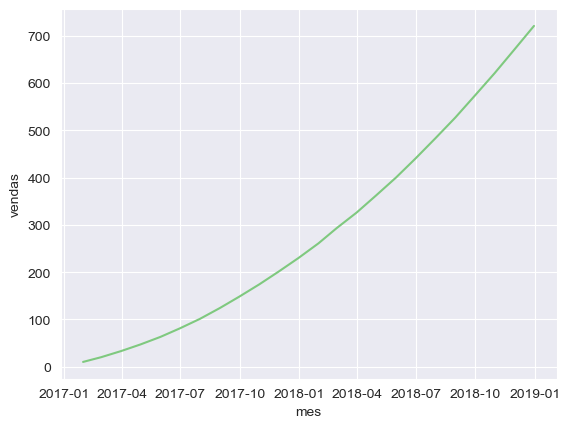

In [42]:
sns.lineplot(x="mes", y="vendas", data=alucar)

Este gráfico está terrivelmente **feio**.

Text(0.5, 0, 'Vendas')

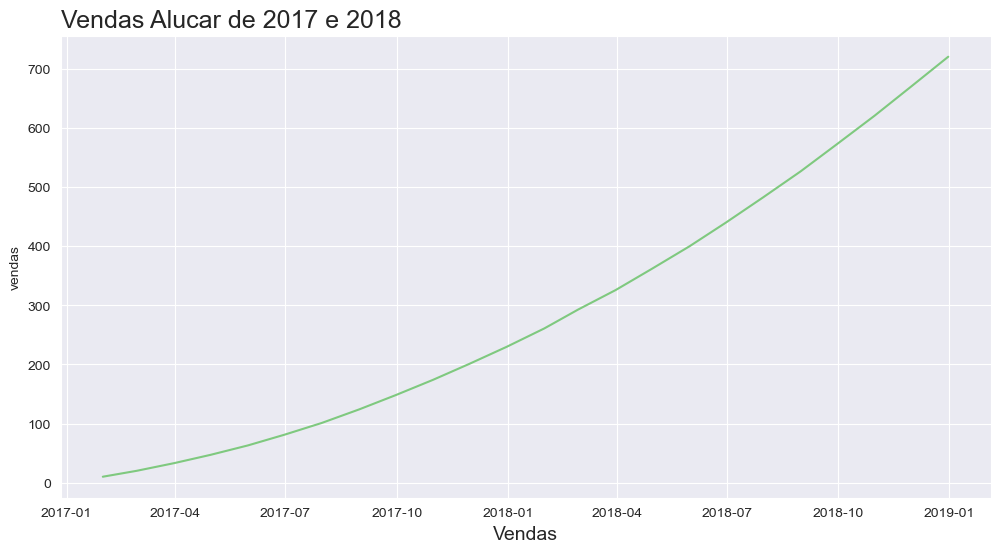

In [43]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.lineplot(x="mes", y="vendas", data=alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title("Vendas Alucar de 2017 e 2018", loc="left", fontsize=18)
ax.set_xlabel("Tempo", fontsize=14)
ax.set_xlabel("Vendas", fontsize=14)

Agora está melhor :)

# Decompondo as vendas

In [44]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [45]:
alucar["aumento"] = alucar.vendas.diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


*E AGORA PRA MOSTRAR O GRÁFICO NOVO?*

Nem fudendo que eu vou repetir código.

In [46]:
def plotar(titulo: str, labelx: str, labely: str, x, y, dataset):
    """Plota um gráfico baseando-se nos estilos definidos."""
    sns.set_palette("Accent")
    sns.set_style("darkgrid")

    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc="left", fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_xlabel(labely, fontsize=14)
    return ax

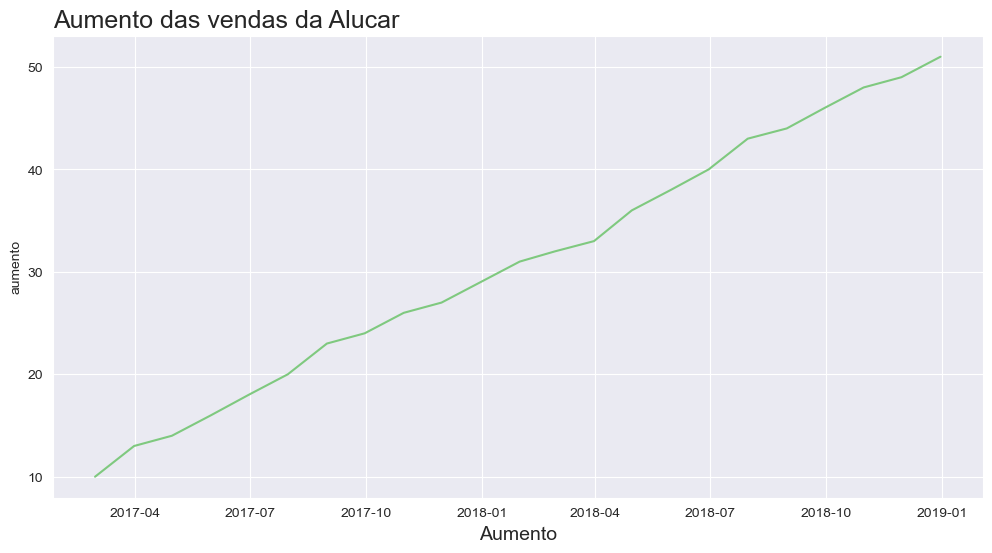

In [47]:
gp_aumento = plotar("Aumento das vendas da Alucar", "Tempo", "Aumento", alucar["mes"], alucar["aumento"], alucar)

## Decompondo a aceleração das vendas

In [48]:
alucar["aceleracao"] = alucar["aumento"].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


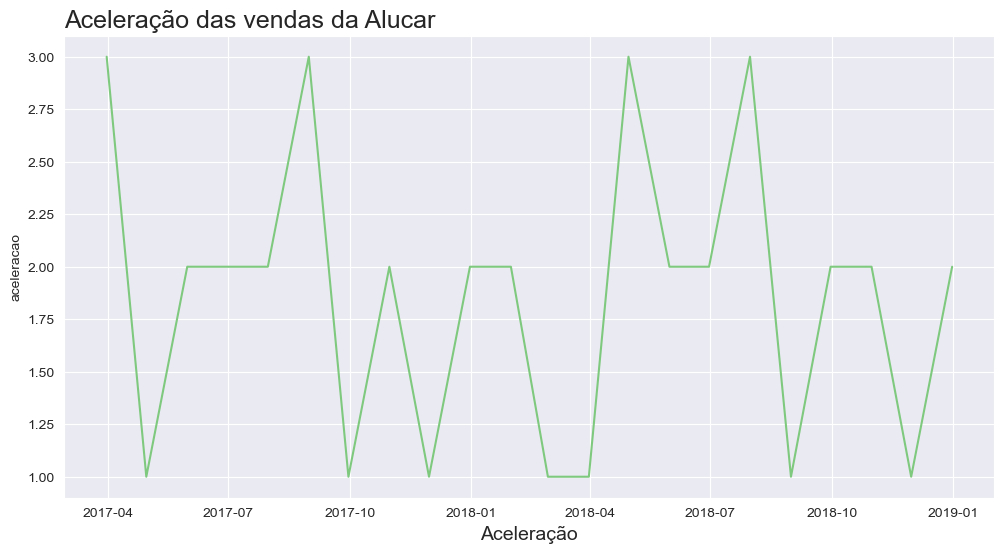

In [49]:
gp_aceleracao = plotar("Aceleração das vendas da Alucar", "Tempo", "Aceleração", alucar["mes"], alucar["aceleracao"], alucar)

## Juntando os gráficos

<AxesSubplot:title={'left':'Análise da Alucar de 2017 e 2018'}, xlabel='mes', ylabel='vendas'>

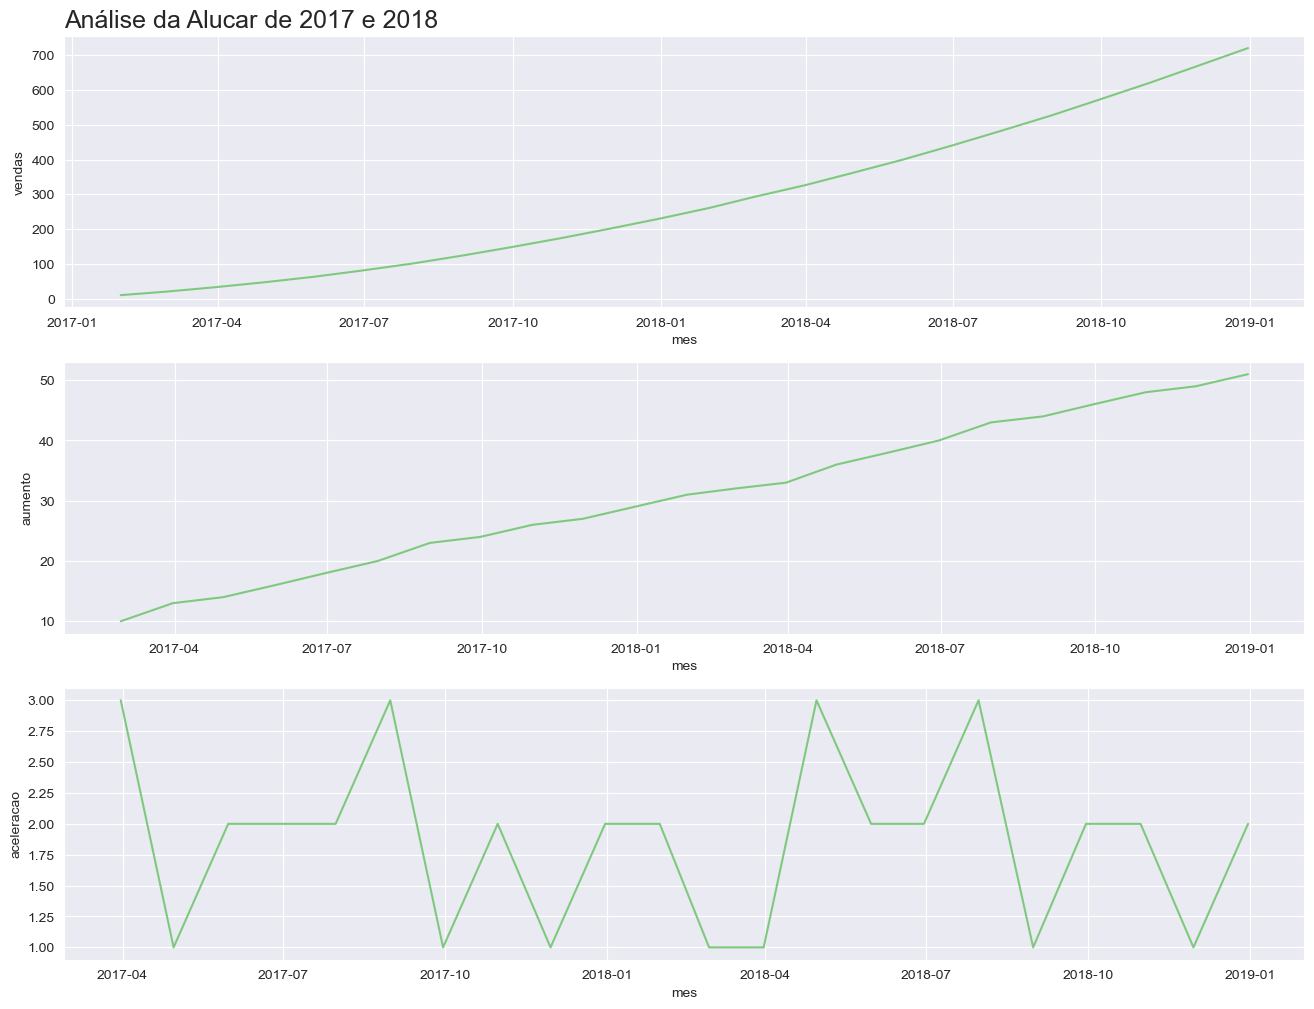

In [55]:
plt.figure(figsize=(16,12))

ax = plt.subplot(3,1,1)
ax.set_title("Análise da Alucar de 2017 e 2018", fontsize=18, loc="left")
sns.lineplot(x="mes", y="vendas", data=alucar)

plt.subplot(3,1,2)
sns.lineplot(x="mes", y="aumento", data=alucar)

plt.subplot(3,1,3)
sns.lineplot(x="mes", y="aceleracao", data=alucar)

ax

In [56]:
def plot_comparacao(titulo: str, x: str, y, dataset):
    plt.figure(figsize=(16,12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc="left")
    sns.lineplot(x=x, y=y[0], data=dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y[1], data=dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y[2], data=dataset)

    return ax

<AxesSubplot:title={'left':'Análise de Vendas da Alucar em 2017 e 2018'}, xlabel='mes', ylabel='vendas'>

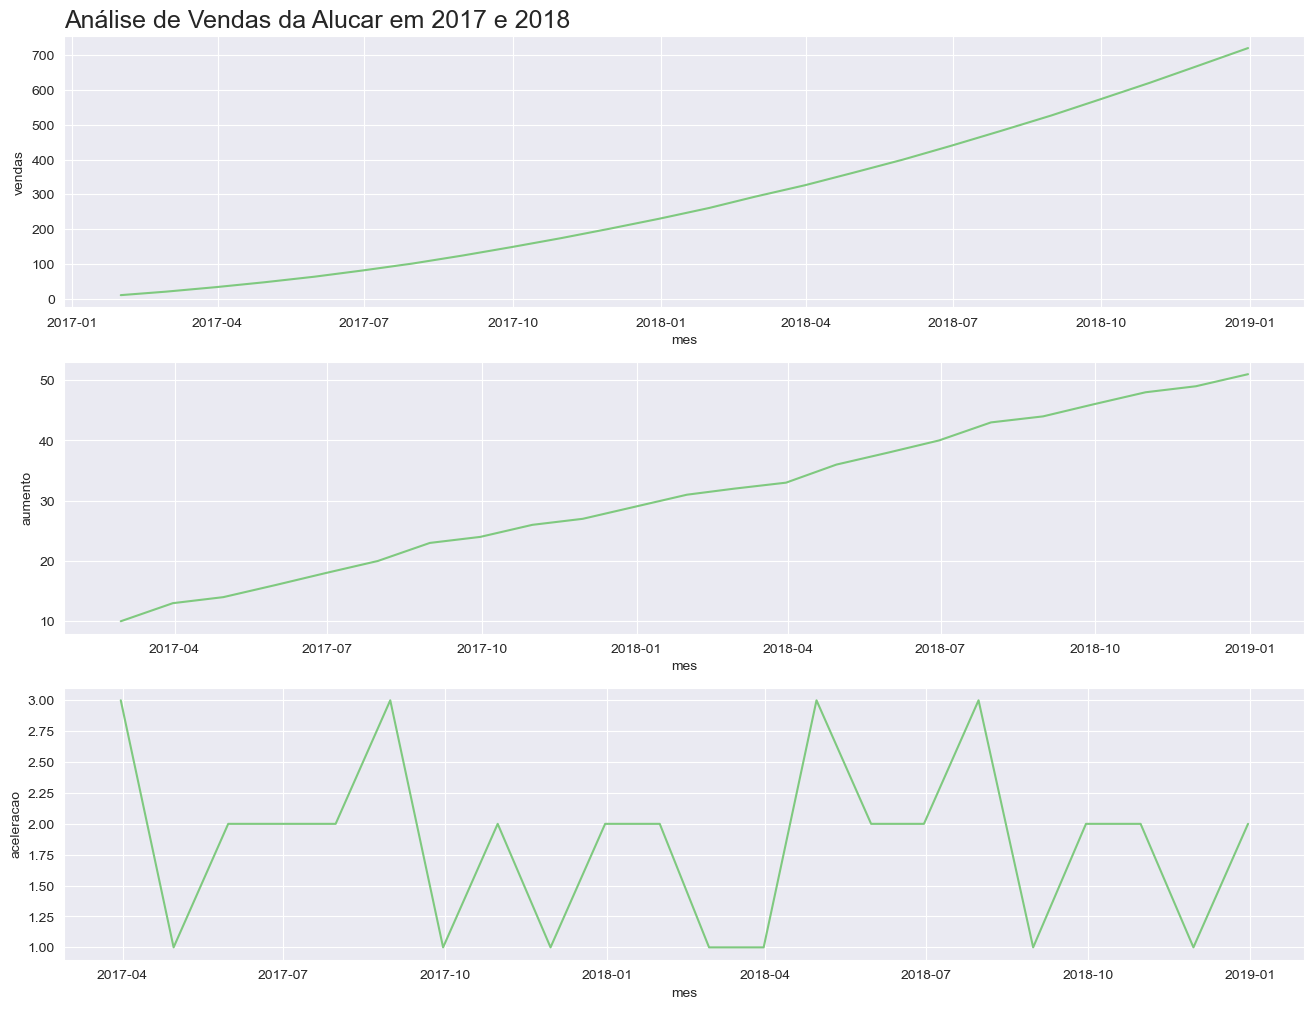

In [60]:
plot_comparacao("Análise de Vendas da Alucar em 2017 e 2018", "mes", ("vendas", "aumento", "aceleracao"), alucar)